# Visualisation - Simulations

In [1]:
using Plots, Random, Distributions, StatsBase
using CSV, DataFrames

In [2]:
include("../data/visualisation_tools.jl")
include("../dynamic_model/dividing.jl")
include("../dynamic_model/model_plate.jl")
include("../dynamic_model/model_well.jl")
include("../stat_model/observation_model.jl")
include("../stat_model/prior.jl")
include("../dynamic_model/support_functions.jl");

# Meta-Configuration

In [3]:
# First division time

#T incucyte - first div - cocktail Diff - Bone Marrow
T_inc = CSV.read("../data/T1.csv", DataFrame) 

T1_HSC = T_inc[T_inc[:,:initial].=="HSC",:T1]
T1_MPP = T_inc[T_inc[:,:initial].=="MPP",:T1]
T1_HPC = T_inc[T_inc[:,:initial].=="HPC",:T1]

empirical_distribution_T1 = [T1_HSC, T1_MPP, T1_HPC]

3-element Vector{Vector{Int64}}:
 [50, 32, 49, 48, 45, 52, 51, 47, 48, 65  …  54, 55, 43, 48, 48, 42, 44, 47, 44, 52]
 [33, 43, 40, 52, 50, 42, 69, 57, 51, 79  …  43, 53, 43, 51, 48, 79, 36, 76, 49, 44]
 [34, 35, 57, 57, 59, 28, 28, 48, 27, 41  …  27, 45, 44, 32, 39, 36, 42, 50, 41, 51]

In [4]:
nb_cell_types = 4;
nb_gen_max = 7;

# Choice parameter vector

In [5]:
prior = PriorDistribution("main")
theta = rand(prior)

(p1_1 = 0.29527441486753425, p1_2 = 0.019224389875986292, p1_3 = 0.6776930596560111, mu_1 = 2.6057267084730684, sig_1 = 0.4825935049265644, rho_H_1 = 0.9034071751526569, p2_2 = 0.25453027118206306, p2_3 = 0.16715399703994738, mu_2 = 1.6359557025516573, sig_2 = 0.07696688517042316, rho_H_2 = 0.9034071751526569, p3_3 = 0.2798273747691127, mu_3 = 1.894710228707601, sig_3 = 0.012225038712655456, rho_H_3 = 0.9034071751526569, mu_4 = 1.793354136300067, sig_4 = 0.4495075326221984, recovery_rate = 0.6572817131712193, rho_H_4 = 0.0, rho_C_sisters_A = 0.5874795552466938, rho_C_sisters_B = 0.0, C = 1, H = 1, rho_C_cousins = 0.0)

# Simulate

## Config

In [6]:
nb_wells = 40;

In [7]:
obs_time = 96.0;

In [8]:
initial_cell = 1; #1: HSC ; 2:MPP ; 3:HPC ; 4:CD34-

In [9]:
s = 10; #Random seed

## Proliferation and differentiation process at the scale of a family

In [10]:
#Simulate two wells with a given random seed, and then a plate with the same random seed
Random.seed!(s)

array_fig_wells = []

for i in 1:nb_wells
    println(i)

    @time well_HSC = grow(initial_cell,theta, obs_time, empirical_distribution_T1,
                    save_state=true,nb_cell_types=nb_cell_types, nb_gen_max=nb_gen_max )

    @show well_HSC[1]
    @show well_HSC[2]
    tree = construct_binary_tree(well_HSC[3],well_HSC[4],well_HSC[5], obs_time);
    push!(array_fig_wells,plot_binary_tree(tree[1], tree[2], title=string("well ",i)))

    println()
end


1
  0.479710 seconds (1.32 M allocations: 87.920 MiB, 3.11% gc time, 99.88% compilation time)
well_HSC[1] = [0 0 0 0; 0 0 0 0; 0 0 2 0; 0 0 1 0; 0 0 0 5; 0 0 0 2; 0 0 0 0]
well_HSC[2] = [74.08766509864654, 82.91286442860878, 93.41202758623058, 89.560011789211, 89.49119572591908, 100.06950625763326, 99.94496682440224]

2
  0.000251 seconds (4.27 k allocations: 426.594 KiB)
well_HSC[1] = [0 0 0 0; 0 0 0 0; 0 0 0 0; 0 0 0 0; 0 0 0 0; 0 0 0 0; 0 0 0 375]
well_HSC[2] = [44.08314058534057, 50.6613179708596, 50.71461326736036, 57.402193468021636, 57.372932275152806, 57.335817117492866, 56.40293009005491]

3
  0.000164 seconds (2.38 k allocations: 221.047 KiB)
well_HSC[1] = [0 0 0 0; 0 0 0 0; 0 0 0 0; 0 0 0 0; 0 0 0 0; 0 0 0 1; 0 0 0 199]
well_HSC[2] = [52.415144327544034, 59.03177022976237, 58.998713346456725, 63.985797227971815, 64.8882307233518, 64.63941428095966, 65.75418315267837]

4
  0.000072 seconds (284 allocations: 18.328 KiB)
well_HSC[1] = [0 0 0 0; 2 0 0 0; 0 0 0 0; 0 0 0 0; 0 0 0 

In [11]:
id_well = 33

33

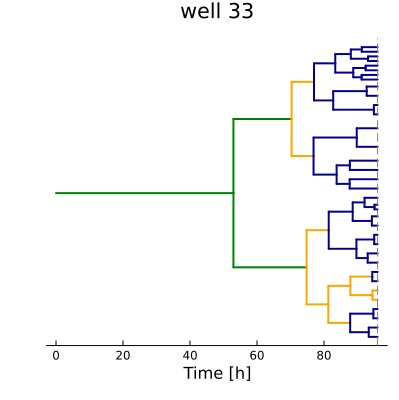

In [12]:
plot(array_fig_wells[id_well])

## Compute and display heatmap

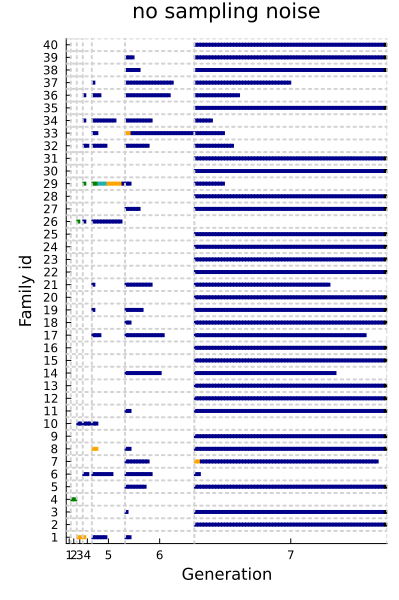

In [13]:
Random.seed!(s) #Use the same random seed than previously to get an heatmap consistent with previous figures

plate_HSC = grow_plate(initial_cell, obs_time, nb_wells, theta, empirical_distribution_T1, 
            nb_cell_types=nb_cell_types, nb_gen_max=nb_gen_max,
            noise=false
            )
hm = construct_heatmap_MG(plate_HSC[1])
plot_heatmap(hm[1], hm[2], title="no sampling noise")